In [4]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Deepak\anaconda\envs\py310\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "C:\Users\Deepak\anaconda\envs\py310\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "C:\Users\Deepak\anaconda\envs\py310\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "C:\Users\Deepak\anaconda\envs\py310\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
# Constants
IMAGE_SIZE = [224, 224]
train_path = "C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [7]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [9]:
folder = glob("C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*")

In [10]:
folder

['C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___Bacterial_spot',
 'C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___Early_blight',
 'C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___healthy',
 'C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___Late_blight',
 'C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___Leaf_Mold',
 'C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___Septoria_leaf_spot',
 'C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train\\Tomato___Spider_mites Two-spott

In [11]:
len(folder)

10

In [12]:
# our layers 
x = Flatten()(inception.output)

In [13]:
prediction = Dense(len(folder), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

**Data Preprocessing**

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [18]:
test_set = test_datagen.flow_from_directory('C:/Users/Deepak/OneDrive/Desktop/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [19]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
574/574 [==============================] - 373s 596ms/step - loss: 2.7720 - accuracy: 0.6872 - val_loss: 2.2473 - val_accuracy: 0.7588
Epoch 2/15
574/574 [==============================] - 240s 418ms/step - loss: 2.0763 - accuracy: 0.7931 - val_loss: 2.4688 - val_accuracy: 0.7764
Epoch 3/15
574/574 [==============================] - 230s 401ms/step - loss: 2.0293 - accuracy: 0.8170 - val_loss: 2.8103 - val_accuracy: 0.7906
Epoch 4/15
574/574 [==============================] - 290s 505ms/step - loss: 1.8747 - accuracy: 0.8419 - val_loss: 2.3894 - val_accuracy: 0.8257
Epoch 5/15
574/574 [==============================] - 306s 534ms/step - loss: 1.9804 - accuracy: 0.8515 - val_loss: 2.1213 - val_accuracy: 0.8386
Epoch 6/15
574/574 [==============================] - 248s 431ms/step - loss: 1.8172 - accuracy: 0.8650 - val_loss: 2.8524 - val_accuracy: 0.8277
Epoch 7/15
574/574 [==============================] - 243s 423ms/step - loss: 1.8153 - accuracy: 0.8730 - val_loss: 3.8473 -

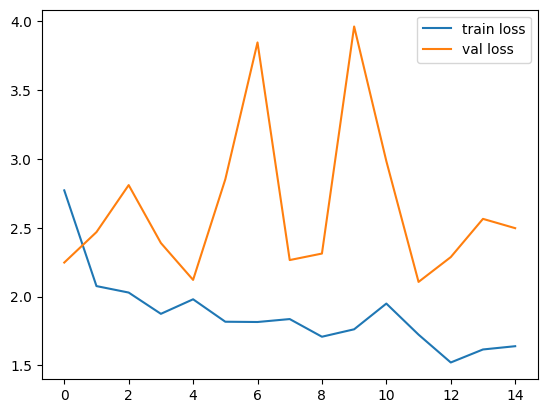

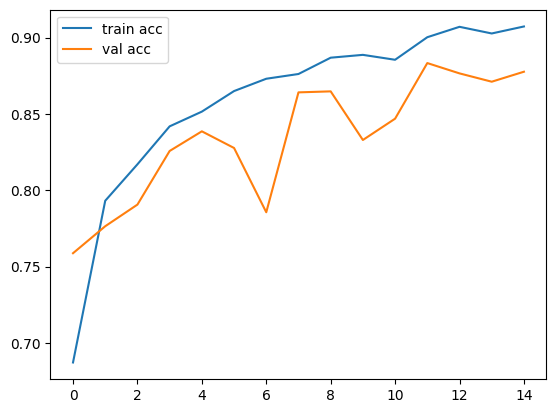

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('tomato_leaf_disease_detection_model.h5')


In [2]:
import os
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

# Path to the folder to monitor
folder_to_monitor = "G:/My Drive/Major-project"

# Path to your saved model
model_path = "tomato_leaf_disease_detection_model.h5"

# Load the saved model
loaded_model = load_model(model_path)

# Define a function to process new images
def process_image(image_path):
    # Load and preprocess the sample image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Make predictions using the loaded model
    prediction = loaded_model.predict(x)
    predicted_class = np.argmax(prediction, axis=1)

    print(f"Predicted Class for {image_path}: {predicted_class}")

# Define a class to handle file system events
class ImageHandler(FileSystemEventHandler):
    def on_created(self, event):
        if event.is_directory:
            return
        if event.src_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"New image detected: {event.src_path}")
            process_image(event.src_path)

# Create an observer and attach the event handler
observer = Observer()
observer.schedule(ImageHandler(), path=folder_to_monitor)
observer.start()

try:
    while True:
        pass
except KeyboardInterrupt:
    observer.stop()
observer.join()


New image detected: G:/My Drive/Major-project\Test-image.jpg
1/1 [==============================] - 33s 33s/step
Predicted Class for G:/My Drive/Major-project\Test-image.jpg: [1]


In [29]:
# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_set, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

144/144 [==============================] - 41s 244ms/step - loss: 2.4973 - accuracy: 0.8776
Test Accuracy: 87.76%


In [26]:
print(training_set.class_indices)


{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
